In [1]:
# do this if you use a custom virtual environment to specify the directory to look for installed packages
import sys
import os
import pandas as pd
import numpy as np
## goes back to the project directory
os.chdir("..")
# switch to the name of your virtual environment
kernel_name = ".venv_mp"
sys.path.append("\\".join([os.getcwd(), kernel_name, "Lib\\site-packages"]))

In [2]:
from data_reader import read_gnfuv_sample_results
from results_helper_functions import merge_gnfuv_results
std = ["original", "standardised"]
data = read_gnfuv_sample_results() 
merged_data = merge_gnfuv_results(data)

In [3]:
for i in range(2):
    print(std[i])
    for experiment in range(1,4):
        print(f"Experiment {experiment}", end=" ")
        df = data[i].loc[(data[i].experiment == experiment)]
        unique_nodes = np.unique(df["model_node"])
        for node in unique_nodes:
            average_baseline_score = df["model_r2"].loc[df.model_node == node].mean()
            print(f"{node} ({round(average_baseline_score, 2)})", end = " ")
        print()
    print()

original
Experiment 1 pi2 (0.99) pi4 (0.94) 
Experiment 2 pi2 (0.3) pi3 (0.51) pi4 (0.3) pi5 (0.75) 
Experiment 3 pi2 (0.94) pi4 (0.99) pi5 (0.55) 

standardised
Experiment 1 pi2 (0.99) pi3 (0.96) pi4 (0.94) 
Experiment 2 pi2 (0.48) pi3 (0.59) pi4 (0.29) pi5 (0.63) 
Experiment 3 pi2 (0.96) pi4 (0.99) 



Experiment 1


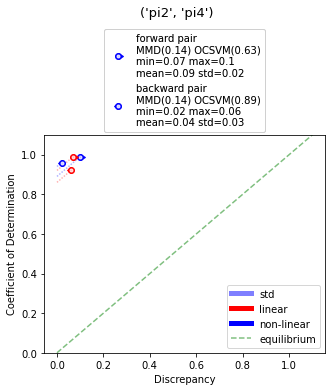

Experiment 2


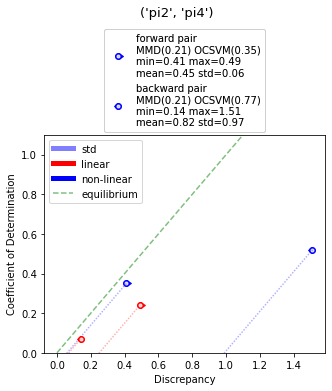

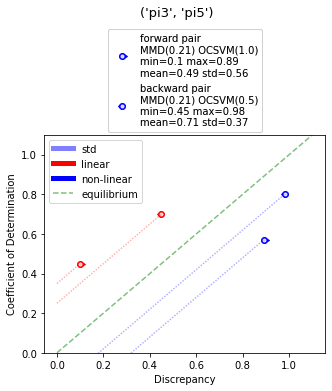

Experiment 3


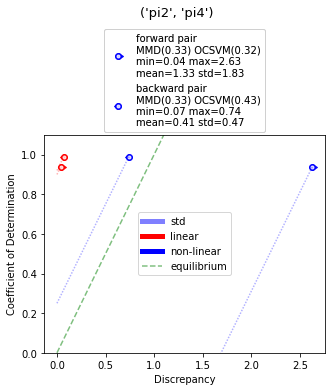

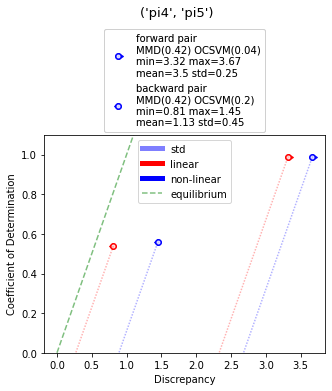

In [4]:
from visualising import plot_gnfuv_r2_discrpenacy
plot_gnfuv_r2_discrpenacy(merged_data[0])

Experiment 1


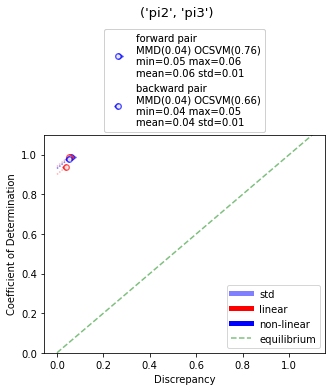

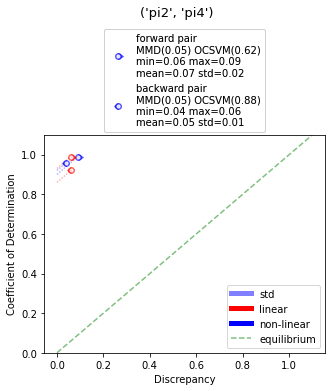

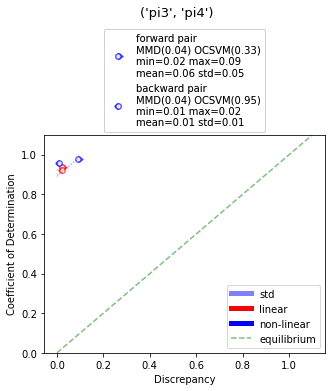

Experiment 2


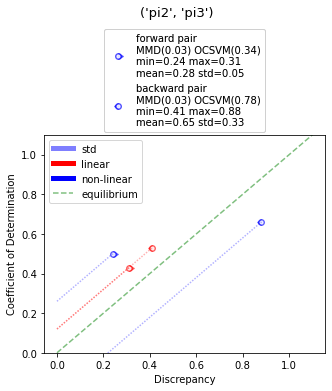

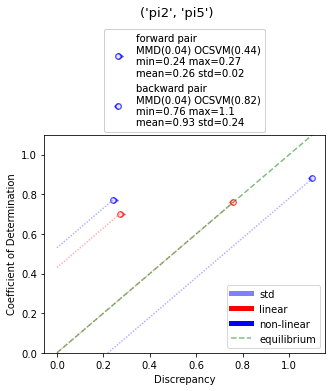

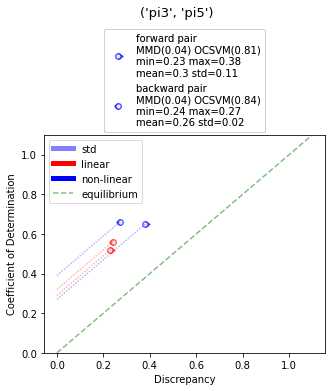

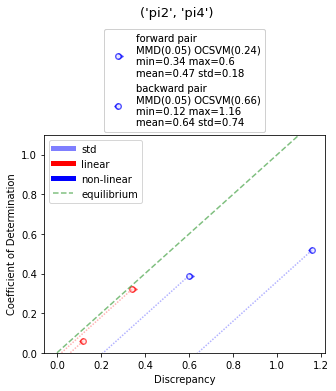

Experiment 3


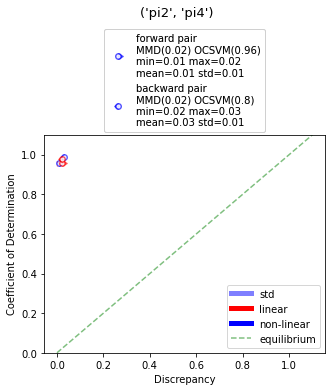

In [5]:
plot_gnfuv_r2_discrpenacy(merged_data[1])

In [6]:
from metrics import combined_precision
print("Combined Precision \n")
combined_precision(data[0])
combined_precision(data[1])
combined_precision(data[0], per_model_type=True)
combined_precision(data[1], per_model_type=True)

Combined Precision 

original
0.6: ([1.0, 0.88, 0.48], 0.79, 0.79) (strict=True), ([1.0, 0.89, 0.96], 0.94, 0.95) (strict=False), 
0.8: ([1.0, 0.4, 0.48], 0.6, 0.63) (strict=True), ([1.0, 0.41, 0.96], 0.74, 0.79) (strict=False), 

standardised
0.6: ([0.41, 0.24, 1.0], 0.43, 0.55) (strict=True), ([0.81, 0.27, 1.0], 0.6, 0.69) (strict=False), 
0.8: ([0.41, 0.24, 1.0], 0.43, 0.55) (strict=True), ([0.81, 0.24, 1.0], 0.59, 0.68) (strict=False), 

original

kernel=rbf
0.6: ([1.0, 0.01, 0.35], 0.4, 0.45) (strict=True), ([1.0, 0.01, 0.35], 0.4, 0.45) (strict=False), 
0.8: ([1.0, 0.0, 0.24], 0.36, 0.41) (strict=True), ([1.0, 0.0, 0.24], 0.36, 0.41) (strict=False), 

kernel=linear
0.6: ([1.0, 0.88, 0.48], 0.79, 0.79) (strict=True), ([1.0, 0.89, 0.96], 0.94, 0.95) (strict=False), 
0.8: ([1.0, 0.4, 0.48], 0.6, 0.63) (strict=True), ([1.0, 0.41, 0.96], 0.74, 0.79) (strict=False), 

standardised

kernel=rbf
0.6: ([0.59, 0.18, 1.0], 0.48, 0.59) (strict=True), ([1.0, 0.25, 1.0], 0.67, 0.75) (strict=Fal

In [3]:
from metrics import ocsvm_precision
print("OCSVM Precision \n")
ocsvm_precision(data[0])
ocsvm_precision(data[1])
print()
ocsvm_precision(data[0], per_model_type=True)
ocsvm_precision(data[1], per_model_type=True)

OCSVM Precision 

original: ([1.0, 0.94, 0.49], 0.82, 0.81) (strict=True), ([1.0, 0.95, 0.97], 0.97, 0.97) (strict=False), 
standardised: ([0.41, 0.26, 1.0], 0.44, 0.56) (strict=True), ([0.81, 0.3, 1.0], 0.62, 0.7) (strict=False), 

original, kernel=rbf: ([1.0, 0.2, 1.0], 0.67, 0.73) (strict=True), ([1.0, 0.23, 1.0], 0.68, 0.74) (strict=False), 
original, kernel=linear: ([1.0, 0.97, 0.49], 0.83, 0.82) (strict=True), ([1.0, 0.97, 0.97], 0.98, 0.98) (strict=False), 
standardised, kernel=rbf: ([0.59, 0.25, 1.0], 0.51, 0.61) (strict=True), ([1.0, 0.32, 1.0], 0.7, 0.77) (strict=False), 
standardised, kernel=linear: ([0.33, 0.23, 1.0], 0.4, 0.52) (strict=True), ([0.81, 0.24, 1.0], 0.59, 0.68) (strict=False), 


In [4]:
from metrics import mmd_precision
print("MMD Precision \n")
mmd_precision(data[0])
mmd_precision(data[1])
print()
mmd_precision(data[0], per_model_type=True)
mmd_precision(data[1], per_model_type=True)

MMD Precision 

original
0.85: ([1.0, 0.27, 0.99], 0.7, 0.75)
0.9: ([1.0, 0.13, 0.99], 0.64, 0.71)
0.95: ([1.0, 0.01, 0.62], 0.48, 0.54)

standardised
0.85: ([1.0, 0.57, 1.0], 0.81, 0.86)
0.9: ([1.0, 0.49, 1.0], 0.78, 0.83)
0.95: ([0.99, 0.41, 1.0], 0.74, 0.8)


original

kernel=rbf
0.85: ([1.0, 0.0, 0.16], 0.34, 0.39)
0.9: ([1.0, 0.0, 0.02], 0.29, 0.34)
0.95: ([0.31, 0.0, 0.0], 0.09, 0.1)

kernel=linear
0.85: ([1.0, 0.28, 0.99], 0.7, 0.76)
0.9: ([1.0, 0.14, 0.99], 0.64, 0.71)
0.95: ([1.0, 0.03, 0.62], 0.49, 0.55)

standardised

kernel=rbf
0.85: ([1.0, 0.14, 1.0], 0.62, 0.71)
0.9: ([1.0, 0.08, 1.0], 0.6, 0.69)
0.95: ([0.65, 0.05, 1.0], 0.44, 0.57)

kernel=linear
0.85: ([1.0, 0.6, 1.0], 0.82, 0.87)
0.9: ([1.0, 0.51, 1.0], 0.79, 0.84)
0.95: ([1.0, 0.42, 1.0], 0.75, 0.81)



In [5]:
from metrics import gnfuv_speedup
print(std[0], ":", gnfuv_speedup(data[0])) 
print(std[1], ":", gnfuv_speedup(data[1]))

original : ([0.23, 0.3, 0.24], 0.26, 0.26)
standardised : ([0.26, 0.3, 0.23], 0.27, 0.26)


In [3]:
from results_helper_functions import gnfuv_data_summary
gnfuv_data_summary(data[0])
gnfuv_data_summary(data[0], best_entry=True)

Data sunmary for experiment 1
rbf models have higher baseline R2 scores and rbf models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 2
rbf models have higher baseline R2 scores and linear models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 3
rbf models have higher baseline R2 scores and linear models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 1
The number of entries per model type are rbf=0, linear=96
linear models have higher baseline R2 scores and linear models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 2
The number of entries per model type are rbf=8, linear=130
rbf models have higher baseline R2 scores and linear models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 3
The number of entr

In [4]:
gnfuv_data_summary(data[1])
gnfuv_data_summary(data[1], best_entry = True)

Data sunmary for experiment 1
rbf models have higher baseline R2 scores and linear models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 2
rbf models have higher baseline R2 scores and linear models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 3
rbf models have higher baseline R2 scores and linear models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 1
The number of entries per model type are rbf=67, linear=110
rbf models have higher baseline R2 scores and rbf models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 2
The number of entries per model type are rbf=49, linear=145
rbf models have higher baseline R2 scores and rbf models have lower discrepancy. 
linear models yield the best results on average. 


Data sunmary for experiment 3
The number of entries

In [60]:
a= {1:2, 3:4}

In [61]:
a[~1]

KeyError: -2